In [1]:
import pandas as pd
import matplotlib.pylab as plt
from sklearn.cluster import KMeans
import numpy as np


In [2]:
X = np.random.uniform(0,1,1000)
Y = np.random.uniform(0,1,1000)
X

array([0.26083793, 0.21256722, 0.46703364, 0.72102465, 0.2291319 ,
       0.96776316, 0.14327135, 0.65015996, 0.92514625, 0.95372945,
       0.74970091, 0.25208864, 0.72029483, 0.22080145, 0.30256442,
       0.71218645, 0.11809536, 0.6009788 , 0.44656484, 0.93162514,
       0.39803301, 0.75023368, 0.36541943, 0.86570909, 0.13087448,
       0.79809693, 0.44568798, 0.49391771, 0.22889083, 0.47024487,
       0.79141105, 0.0171489 , 0.08893609, 0.88445662, 0.3688456 ,
       0.46268679, 0.68941946, 0.34126517, 0.78335052, 0.33465396,
       0.31143828, 0.60138387, 0.86841732, 0.31239411, 0.05165552,
       0.10228183, 0.07723072, 0.33845756, 0.42001246, 0.51369789,
       0.95810938, 0.47761344, 0.9927583 , 0.57930175, 0.79629252,
       0.24519425, 0.57085332, 0.03980704, 0.80664191, 0.04565253,
       0.83676385, 0.35703501, 0.7452077 , 0.65564219, 0.77055305,
       0.63220267, 0.66394874, 0.01476258, 0.85583389, 0.41315914,
       0.14824042, 0.07276202, 0.36526585, 0.29305324, 0.48675

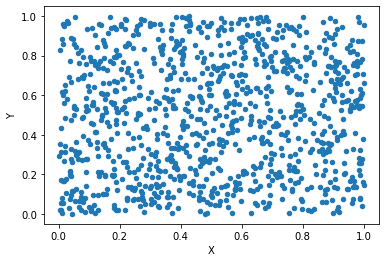

In [18]:
df_xy =pd.DataFrame(columns=["X","Y"])
df_xy
df_xy.X = X
df_xy.Y = Y
df_xy
df_xy.plot(x="X",y = "Y",kind="scatter")
model1 = KMeans(n_clusters=5).fit(df_xy)



<AxesSubplot:xlabel='X', ylabel='Y'>

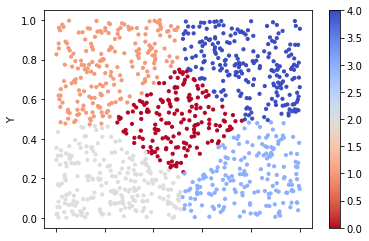

In [21]:
df_xy.plot(x="X",y = "Y",c=model1.labels_,kind="scatter",s=10,cmap=plt.cm.coolwarm_r)

In [5]:
Univ = pd.read_csv("Universities_Clustering.csv")
Univ

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90
5,Dartmouth,1340,89,23,10,32162,95
6,Duke,1315,90,30,12,31585,95
7,Georgetown,1255,74,24,12,20126,92
8,Harvard,1400,91,14,11,39525,97
9,JohnsHopkins,1305,75,44,7,58691,87


In [6]:
def norm_func(i):
    x = (i-i.min()) / (i.max() - i.min())
    return (x)

In [7]:
df_norm = norm_func(Univ.iloc[:,1:])

In [8]:
df_norm.head(10)  # Top 10 rows


,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,0.743902,0.847222,0.105263,0.368421,0.255144,0.900000
1,1.000000,1.000000,0.144737,0.000000,1.000000,0.466667
2,0.621951,0.472222,0.592105,0.157895,0.297461,0.166667
3,0.743902,0.666667,0.131579,0.315789,0.415629,0.700000
4,0.670732,0.763889,0.250000,0.368421,0.239835,0.766667
5,0.817073,0.847222,0.118421,0.210526,0.427512,0.933333
6,0.756098,0.861111,0.210526,0.315789,0.416996,0.933333
7,0.609756,0.638889,0.131579,0.315789,0.208161,0.833333
8,0.963415,0.875000,0.000000,0.263158,0.561699,1.000000
9,0.731707,0.652778,0.394737,0.052632,0.910991,0.666667


C:\Users\KEERTHI KUMAR\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


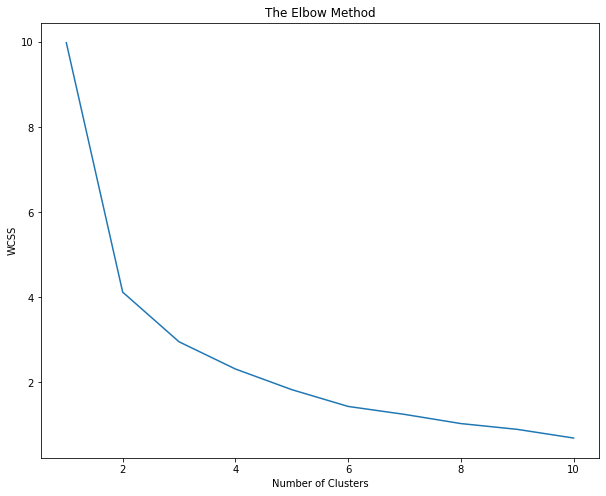

In [9]:
from sklearn.cluster import KMeans
fig = plt.figure(figsize=(10, 8))
WCSS = []
for i in range(1, 11):
    clf = KMeans(n_clusters=i)
    clf.fit(df_norm)
    WCSS.append(clf.inertia_) # inertia is another name for WCSS
plt.plot(range(1, 11), WCSS)
plt.title('The Elbow Method')
plt.ylabel('WCSS')
plt.xlabel('Number of Clusters')
plt.show()

In [10]:
clf = KMeans(n_clusters=5)
y_kmeans = clf.fit_predict(df_norm)

In [11]:
y_kmeans
#clf.cluster_centers_
clf.labels_

array([2, 3, 4, 2, 0, 2, 2, 0, 2, 3, 2, 0, 0, 1, 2, 1, 2, 1, 0, 0, 0, 0,
       0, 1, 2])

In [12]:
md=pd.Series(y_kmeans)  # converting numpy array into pandas series object 
Univ['clust']=md # creating a  new column and assigning it to new column 
Univ

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,clust
0,Brown,1310,89,22,13,22704,94,2
1,CalTech,1415,100,25,6,63575,81,3
2,CMU,1260,62,59,9,25026,72,4
3,Columbia,1310,76,24,12,31510,88,2
4,Cornell,1280,83,33,13,21864,90,0
5,Dartmouth,1340,89,23,10,32162,95,2
6,Duke,1315,90,30,12,31585,95,2
7,Georgetown,1255,74,24,12,20126,92,0
8,Harvard,1400,91,14,11,39525,97,2
9,JohnsHopkins,1305,75,44,7,58691,87,3


In [13]:
Univ.iloc[:,1:7].groupby(Univ.clust).mean()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
clust,,,,,,
0,1252.222222,79.444444,41.777778,13.333333,21672.888889,88.555556
1,1061.500000,38.750000,70.000000,19.250000,9953.000000,71.750000
2,1351.666667,89.444444,21.777778,11.000000,33615.555556,93.777778
3,1360.000000,87.500000,34.500000,6.500000,61133.000000,84.000000
4,1260.000000,62.000000,59.000000,9.000000,25026.000000,72.000000


Text(0.5, 1.0, 'Clusters using KMeans')

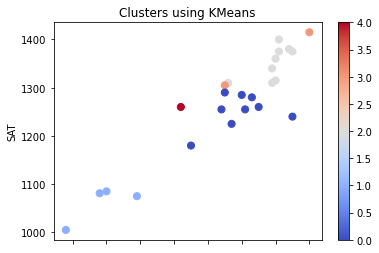

In [14]:
Univ.plot(x="Top10",y ="SAT",c=clf.labels_,kind="scatter",s=50 ,cmap=plt.cm.coolwarm) 
plt.title('Clusters using KMeans')

In [15]:
clf.inertia_

1.8071716896027337

In [16]:
WCSS 


[9.988235196638557,
 4.123452442397181,
 2.9556843285735432,
 2.316066848130834,
 1.83040917220182,
 1.4358167122481664,
 1.2490400705538667,
 1.0329182266672727,
 0.8968471441168044,
 0.6928143554292531]